In [2]:
import os, shutil 
from PIL import Image 
import cv2
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from piqa import PSNR, SSIM
import torchvision.transforms as transforms
convert_tensor = transforms.ToTensor()
# 1. Import the necessary packages
from skimage.metrics import structural_similarity
import argparse
import imutils
import cv2

In [3]:
#ls = os.listdir('4x_original/')
values_swinir= []

def folder_psnr(original_folder="../original/", method="swinir",res="4x"):
    """
    Calculates Peak Signal To Noise (PSNR) Ratio between two folders (original and method)

    Parameters
    ----------
    original_folder : str
        Folder containing the original images
    method : str
        method of super-resolution applied to images
    res : str
        Super-resolution operation of the images
        SR image folder MUST BE named as: res_method (e.g. 4x_swinir)
    Returns
    -------
    psnr_values : list
        List of PSNR values
    mean_psnr : float
        Mean PSNR value

    """

    original_folder = original_folder
    ls = os.listdir(original_folder)

    values_psnr = []

    for i in ls:
        if int(i[:-4]) <= 2151 and int(i[:-4]) >= 2050:
            X = Image.open(f"{original_folder}/{i}")
            X = convert_tensor(X)
            Y = Image.open(f"{method}_{res}/{i}")
            Y = convert_tensor(Y)
            psnr = PSNR()
            value = psnr(X, Y)
            values_psnr.append(float(value))  
    mean_psnr = np.mean(values_psnr)

    return values_psnr, mean_psnr

In [4]:
def single_psnr_image(image_name, res="2x"):

    X = Image.open(f"../original/{image_name}")
    X = convert_tensor(X)
    Y = Image.open(f"../swinir_{res}/{image_name}")
    Y = convert_tensor(Y)
    psnr = PSNR()
    psnr_swinir = psnr(X, Y)
    Y2 = Image.open(f"../rcanit_{res}/{image_name}")
    Y2 = convert_tensor(Y2)
    psnr2 = PSNR()
    psnr_rcan = psnr2(X, Y2)   
    Y3 = Image.open(f"../nearest_{res}/{image_name}")
    Y3 = convert_tensor(Y3)
    psnr3 = PSNR()
    psnr_nearest = psnr3(X, Y3)   

    return round(float(psnr_swinir),2), round(float(psnr_rcan),2), round(float(psnr_nearest),2)


In [5]:
def single_ssim_image(image_name, res="2x"):
    imageA = cv2.imread(f"../original/{image_name}")
    imageB = cv2.imread(f"../swinir_{res}/{image_name}")
    imageC = cv2.imread(f"../rcanit_{res}/{image_name}")
    imageD = cv2.imread(f"../nearest_{res}/{image_name}")


    # 4. Convert the images to grayscale
    grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
    grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)
    grayC = cv2.cvtColor(imageC, cv2.COLOR_BGR2GRAY)
    grayD = cv2.cvtColor(imageD, cv2.COLOR_BGR2GRAY)


    # 5. Compute the Structural Similarity Index (SSIM) between the two
    #    images, ensuring that the difference image is returned
    (ssim_swinir, _) = structural_similarity(grayA, grayB, full=True)
    #diff = (diff * 255).astype("uint8")   
    (ssim_rcanit, _) = structural_similarity(grayA, grayC, full=True)
    #diff = (diff * 255).astype("uint8")
    (ssim_nearest, _) = structural_similarity(grayA, grayD, full=True)


    return round(float(ssim_swinir),2), round(float(ssim_rcanit),2), round(float(ssim_nearest),2)

In [6]:
psnr_swinir_2100, psnr_rcan_2100, psnr_lanczos_2100 = single_psnr_image("2100.png", res="2x")

In [7]:
print(psnr_swinir_2100, psnr_rcan_2100, psnr_lanczos_2100)

34.16 32.45 29.2


In [8]:
ssim_swinir_2100, ssim_rcan_2100, ssim_lanczos_2100 = single_ssim_image("2109.png", res="2x")

In [9]:
print(ssim_swinir_2100, ssim_rcan_2100, ssim_lanczos_2100)

0.93 0.89 0.84


In [18]:
values_swinir, mean_swinir = folder_psnr(method="../swinir")
values_nearest, mean_nearest = folder_psnr(method="../nearest")
values_bilinear, mean_bilinear = folder_psnr(method="../bilinear")
values_bicubic, mean_bicubic = folder_psnr(method="../bicubic")
values_lanczos, mean_lanczos = folder_psnr(method="../lanczos")
values_rcanit, mean_rcanit = folder_psnr(method="../rcanit")


print(mean_swinir)
print(mean_nearest)
print(mean_bilinear)
print(mean_bicubic)
print(mean_lanczos)
print(mean_rcanit)

25.451374128753063
22.297405242919922
23.48898910073673
24.1478775248808
24.426744199266622
25.307925093407725


In [115]:
ls = os.listdir("../original/")


In [116]:
values_swinir_2x, mean_swinir_2x = folder_psnr(method="../swinir", res="2x")
values_nearest_2x, mean_nearest_2x = folder_psnr(method="../nearest", res="2x")
values_bilinear_2x, mean_bilinear_2x = folder_psnr(method="../bilinear", res="2x")
values_bicubic_2x, mean_bicubic_2x = folder_psnr(method="../bicubic", res="2x")
values_lanczos_2x, mean_lanczos_2x = folder_psnr(method="../lanczos", res="2x")
values_rcanit_2x, mean_rcanit_2x = folder_psnr(method="../rcanit", res="2x")


print(mean_swinir_2x)
print(mean_nearest_2x)
print(mean_bilinear_2x)
print(mean_bicubic_2x)
print(mean_lanczos_2x)
print(mean_rcanit_2x)

32.309020696901804
26.56207997191186
28.68662923925063
29.914664287193148
29.98026361652449
30.01084249159869


In [117]:
dct = {'SwinIR': values_swinir, 'RCANIT': values_rcanit, 'Lanczos': values_lanczos, 'Bicubic': values_bicubic, 'Bilinear': values_bilinear,  'Nearest': values_nearest}

df = pd.DataFrame(dct)
df = df.melt()

In [118]:
dct_2x = {'SwinIR': values_swinir_2x, 'RCANIT': values_rcanit_2x, 'Lanczos': values_lanczos_2x, 'Bicubic': values_bicubic_2x, 'Bilinear': values_bilinear_2x,  'Nearest': values_nearest_2x}

df_2x = pd.DataFrame(dct_2x)
df_2x = df_2x.melt()

In [119]:
df.columns = ["Method", "PSNR_4x"]
# add column with 1 if method is SwinIR and 0 if not
df['SwinIR'] = df['Method'].apply(lambda x: 1 if x == 'SwinIR' else 0)

df_2x.columns = ["Method", "PSNR_2x"]
# add column with 1 if method is SwinIR and 0 if not
df_2x['SwinIR'] = df_2x['Method'].apply(lambda x: 1 if x == 'SwinIR' else 0)


In [125]:
df["PSNR_2x"] = df_2x["PSNR_2x"]
#df = df.drop(columns=['SwinIR'])
df["Image"] = ls*6
df

Method    PSNR_4x    PSNR_2x     Image
0     SwinIR  28.490662  34.163120  2100.png
1     SwinIR  28.508085  34.847763  2101.png
2     SwinIR  26.211344  32.446194  2102.png
3     SwinIR  26.090902  33.502903  2103.png
4     SwinIR  24.664530  32.210293  2104.png
..       ...        ...        ...       ...
301  Nearest  23.506090  27.142733  2146.png
302  Nearest  22.275282  26.989538  2147.png
303  Nearest  22.489822  26.840767  2148.png
304  Nearest  28.257957  32.824631  2149.png
305  Nearest  23.422966  28.076025  2150.png

[306 rows x 4 columns]

In [34]:
class CropLayer(object):
    # TAKEN FROM: https://github.com/opencv/opencv/blob/master/samples/dnn/edge_detection.py
    def __init__(self, params, blobs):
        self.xstart = 0
        self.xend = 0
        self.ystart = 0
        self.yend = 0

    # Our layer receives two inputs. We need to crop the first input blob
    # to match a shape of the second one (keeping batch size and number of channels)
    def getMemoryShapes(self, inputs):
        inputShape, targetShape = inputs[0], inputs[1]
        batchSize, numChannels = inputShape[0], inputShape[1]
        height, width = targetShape[2], targetShape[3]

        self.ystart = int((inputShape[2] - targetShape[2]) / 2)
        self.xstart = int((inputShape[3] - targetShape[3]) / 2)
        self.yend = self.ystart + height
        self.xend = self.xstart + width

        return [[batchSize, numChannels, height, width]]

    def forward(self, inputs):
        return [inputs[0][:,:,self.ystart:self.yend,self.xstart:self.xend]]

net = cv2.dnn.readNetFromCaffe("deploy.prototxt", "hed_pretrained_bsds.caffemodel")
cv2.dnn_registerLayer('Crop', CropLayer)

def hed_filter(image):

    #image=cv.resize(image,(args.width,args.height))

    inp = cv2.dnn.blobFromImage(image, scalefactor=1.0, size=image.shape[:2],
                            mean=(104.00698793, 116.66876762, 122.67891434),
                            swapRB=False, crop=False)
    net.setInput(inp)
    # edges = cv.Canny(image,image.shape[1],image.shape[0])
    out = net.forward()

    out = out[0, 0]
    out = cv2.resize(out, (image.shape[1], image.shape[0]))
    out=cv2.cvtColor(out,cv2.COLOR_GRAY2BGR)
    out = 255 * out
    out = out.astype(np.uint8)

    return out

### Single image comparison of methods

In [17]:
folder_original = '../original/'
folder_rcan = "../rcanit_4x/"
folder_lanczos = "../lanczos_4x/"
folder_bicubic = "../bicubic_4x/"
folder_swinir = "../swinir_4x/"
folder_nearest = "../nearest_4x/"
image = "2147.png"

In [13]:
def graphImgs(imgs, title=None, x_label=None, cmap="Greys_r", figsize=(12,6)):
    """ imgs ->  a list of images
        title ->  a list of strings        
        returns mpl subplots
    """
    fig, axes = plt.subplots(nrows=1, ncols=len(imgs), figsize=figsize)
    for i, ax in enumerate(axes):
        ax.imshow(imgs[i], cmap=cmap)
        if title is not None:
            try:
                ax.set_title(title[i])
            except:
                pass
        if x_label is not None:
            try:
                ax.set_xlabel(x_label[i])
            except:
                pass
    # display without ticks 
    for ax in axes.flat:
        ax.set(xticks=[], yticks=[])
    
    # save image in dpi 600
    fig.savefig('comparison_2147.png', dpi=600)
    fig.tight_layout()

In [16]:
image_original = Image.open(folder_original + image)
image_lanczos = Image.open(folder_lanczos + image)
image_bicubic = Image.open(folder_bicubic + image)
image_swinir = Image.open(folder_swinir + image)
image_rcan = Image.open(folder_rcan + image)
image_nearest = Image.open(folder_nearest + image)


image_original = np.array(image_original)
image_lanczos = np.array(image_lanczos)
image_bicubic = np.array(image_bicubic)
image_swinir = np.array(image_swinir)   
image_rcan = np.array(image_rcan)
image_nearest = np.array(image_nearest)



In [11]:


ssim_swinir_2128, ssim_rcan_2128, ssim_nearest_2128 = single_ssim_image(image, res="2x")
psnr_swinir_2128, psnr_rcan_2128, psnr_nearest_2128 = single_psnr_image(image, res="2x")


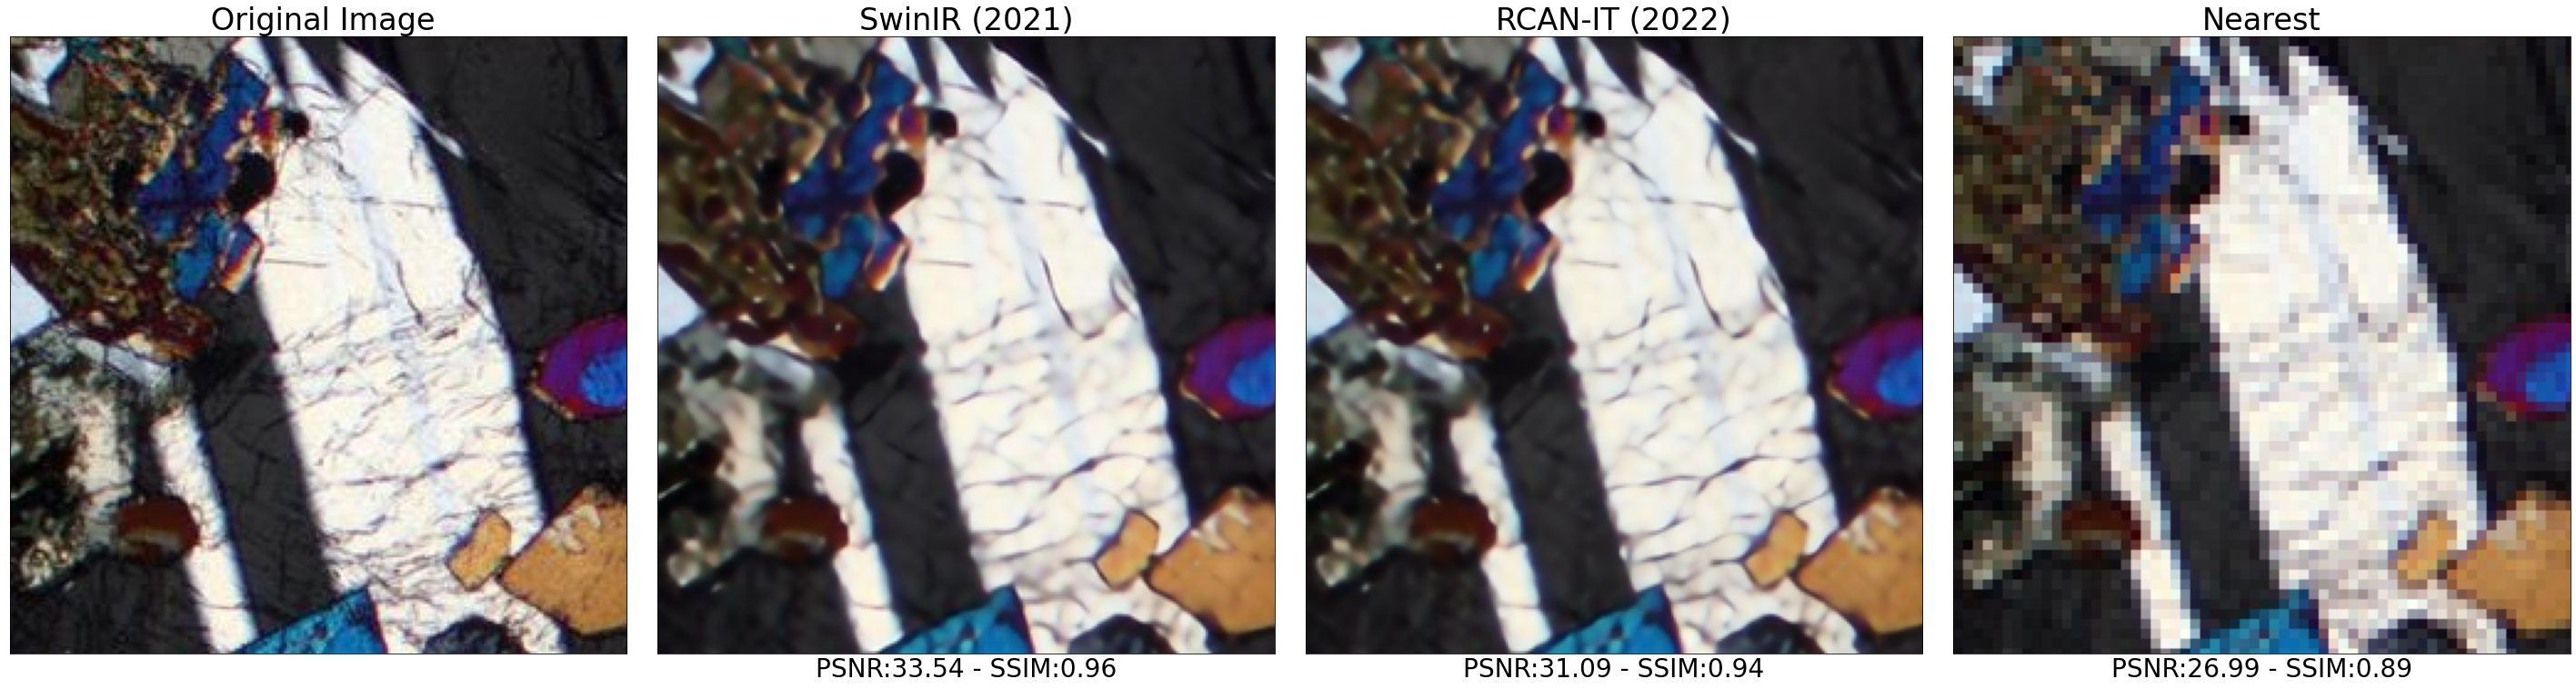

In [23]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 28})

graphImgs([image_original[:250,:250,:], image_swinir[:250,:250,:], image_rcan[:250,:250,:], image_nearest[:250,:250,:]], [" Original Image", "SwinIR (2021)", "RCAN-IT (2022)", "Nearest"], ["", f"PSNR:{psnr_swinir_2128:.2f} - SSIM:{ssim_swinir_2128:.2f}", f"PSNR:{psnr_rcan_2128:.2f} - SSIM:{ssim_rcan_2128:.2f}", f"PSNR:{psnr_nearest_2128:.2f} - SSIM:{ssim_nearest_2128:.2f}"], figsize=(40,20))


In [42]:
hed_original = hed_filter(image_original)



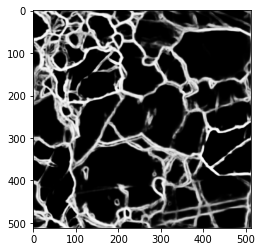

In [43]:
plt.imshow(hed_original)

In [44]:
hed_lanczos = hed_filter(image_lanczos)
hed_bicubic = hed_filter(image_bicubic)
hed_swinir = hed_filter(image_swinir)
hed_rcan = hed_filter(image_rcan)


In [45]:
def filter_canny(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(img,255/2,255)
    return edges

canny_original = filter_canny(hed_original)
canny_lanczos = filter_canny(hed_lanczos)
canny_bicubic = filter_canny(hed_bicubic)
canny_swinir = filter_canny(hed_swinir)
canny_rcan = filter_canny(hed_rcan)

In [46]:
def graphImgs(imgs, title=None, cmap="Greys_r", figsize=(12,6)):
    """ imgs ->  a list of images
        title ->  a list of strings        
        returns mpl subplots
    """
    fig, axes = plt.subplots(nrows=1, ncols=len(imgs), figsize=figsize)
    for i, ax in enumerate(axes):
        ax.imshow(imgs[i], cmap=cmap)
        if title is not None:
            try:
                ax.set_title(title[i])
            except:
                pass
    fig.tight_layout()


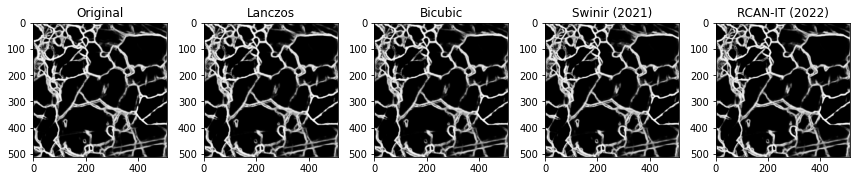

In [47]:

graphImgs([hed_original, hed_lanczos, hed_bicubic, hed_swinir, hed_rcan],["Original", "Lanczos", "Bicubic", "Swinir (2021)", "RCAN-IT (2022)"])

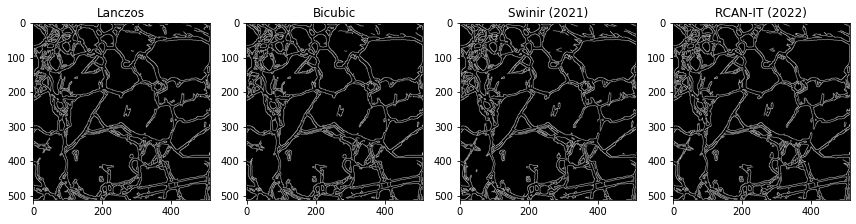

In [48]:
graphImgs([canny_lanczos, canny_bicubic, canny_swinir, canny_rcan],["Lanczos", "Bicubic", "Swinir (2021)", "RCAN-IT (2022)"])

In [106]:
def mse(imageA, imageB):
    """ calculate mse between two images """
    # the 'Mean Squared Error' between the two images is the sum of the squared difference between the two images
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

print(mse(hed_original, hed_lanczos))

777.2639694213867


In [107]:
print(mse(hed_original, hed_bicubic))

638.4755058288574


In [108]:
print(mse(hed_original, hed_rcan))
print(mse(hed_original, hed_swinir))

1347.9327507019043
713.8349647521973


In [109]:
canny_original.shape

(512, 512)

Image Similarity: 65.5356%


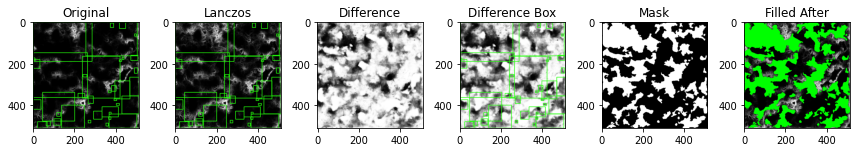

In [115]:
from skimage.metrics import structural_similarity
import cv2
import numpy as np

# Load images
before = hed_original.copy()
after = hed_rcan.copy()

# Convert images to grayscale
before_gray = cv2.cvtColor(before, cv2.COLOR_RGB2GRAY)
after_gray = cv2.cvtColor(after, cv2.COLOR_RGB2GRAY)

# Compute SSIM between the two images
(score, diff) = structural_similarity(before_gray, after_gray, full=True)
print("Image Similarity: {:.4f}%".format(score * 100))

# The diff image contains the actual image differences between the two images
# and is represented as a floating point data type in the range [0,1] 
# so we must convert the array to 8-bit unsigned integers in the range
# [0,255] before we can use it with OpenCV
diff = (diff * 255).astype("uint8")
diff_box = cv2.merge([diff, diff, diff])

# Threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]

mask = np.zeros(before.shape, dtype='uint8')
filled_after = after.copy()

for c in contours:
    area = cv2.contourArea(c)
    if area > 40:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(before, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.rectangle(after, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.rectangle(diff_box, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.drawContours(mask, [c], 0, (255,255,255), -1)
        cv2.drawContours(filled_after, [c], 0, (0,255,0), -1)

# cv2.imshow('before', before)
# cv2.imshow('after', after)
# cv2.imshow('diff', diff)
# cv2.imshow('diff_box', diff_box)
# cv2.imshow('mask', mask)
# cv2.imshow('filled after', filled_after)
#cv2.waitKey()

graphImgs([before, after, diff, diff_box, mask, filled_after],["Original", "Lanczos", "Difference", "Difference Box","Mask", "Filled After"])

In [30]:
!pip install indicoio

  Created wheel for indicoio: filename=IndicoIo-1.4.1-py3-none-any.whl size=39544 sha256=4afb00af32a3ffe85359479daddd316cbd84b8d0f5df2f69c6876b0a65a0f573
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\15\94\19\244802e1ebe5bca7784a7827809b328b333576a33029d5e52f
  Created wheel for msgpack: filename=msgpack-0.5.6-cp38-cp38-win_amd64.whl size=87470 sha256=b73ce0b9c9927f528f587c3fa8bb0cc026ca29972e41100acb4b6ff938631842
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\76\4f\f8\ae8a4c400b133d85993bc9fa130c475ac597fb60b6aaa61bf1
  Created wheel for msgpack-python: filename=msgpack_python-0.5.6-cp38-cp38-win_amd64.whl size=83855 sha256=2ac1f5a5dc7a8792929a1e6ec1d1ea6cb036e9b75630fb33ef761696f781d135
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\03\7f\e7\8ec405fe5220fe1401be3dfa943f6e1f10b525f54f68d75e0a
  Running setup.py clean for Pillow
Successfully built indicoio msgpack msgpack-python
Failed to build Pillow
  Attempting uninsta

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\USER\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\USER\\AppData\\Local\\Temp\\pip-install-eg3lgo_q\\pillow_4ccfef82fa56440b96bdb30c709054e9\\setup.py'"'"'; __file__='"'"'C:\\Users\\USER\\AppData\\Local\\Temp\\pip-install-eg3lgo_q\\pillow_4ccfef82fa56440b96bdb30c709054e9\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\USER\AppData\Local\Temp\pip-wheel-ts37b6i0'
       cwd: C:\Users\USER\AppData\Local\Temp\pip-install-eg3lgo_q\pillow_4ccfef82fa56440b96bdb30c709054e9\
  Complete output (176 lines):
  C:\Users\USER\AppData\Local\Temp\pip-install-eg3lgo_q\pillow_4ccfef82fa56440b96bdb30c709054e9\setup.py:29: RuntimeWarning: Pillow does not yet support Python 3.8 and does not yet provide prebuilt Windows binaries. We do not r

Image Similarity: 95.2351%


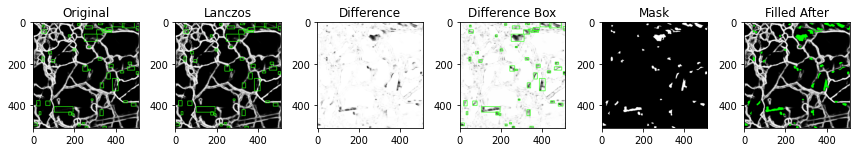

In [51]:
from skimage.metrics import structural_similarity
import cv2
import numpy as np

# Load images
before = hed_original.copy()
after = hed_lanczos.copy()

# Convert images to grayscale
before_gray = cv2.cvtColor(before, cv2.COLOR_BGR2GRAY)
after_gray = cv2.cvtColor(after, cv2.COLOR_BGR2GRAY)

# Compute SSIM between the two images
(score, diff) = structural_similarity(before_gray, after_gray, full=True)
print("Image Similarity: {:.4f}%".format(score * 100))

# The diff image contains the actual image differences between the two images
# and is represented as a floating point data type in the range [0,1] 
# so we must convert the array to 8-bit unsigned integers in the range
# [0,255] before we can use it with OpenCV
diff = (diff * 255).astype("uint8")
diff_box = cv2.merge([diff, diff, diff])

# Threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]

mask = np.zeros(before.shape, dtype='uint8')
filled_after = after.copy()

for c in contours:
    area = cv2.contourArea(c)
    if area > 40:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(before, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.rectangle(after, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.rectangle(diff_box, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.drawContours(mask, [c], 0, (255,255,255), -1)
        cv2.drawContours(filled_after, [c], 0, (0,255,0), -1)

# cv2.imshow('before', before)
# cv2.imshow('after', after)
# cv2.imshow('diff', diff)
# cv2.imshow('diff_box', diff_box)
# cv2.imshow('mask', mask)
# cv2.imshow('filled after', filled_after)
cv2.waitKey()

graphImgs([before, after, diff, diff_box, mask, filled_after],["Original", "Lanczos", "Difference", "Difference Box","Mask", "Filled After"])

Image Similarity: 97.9241%


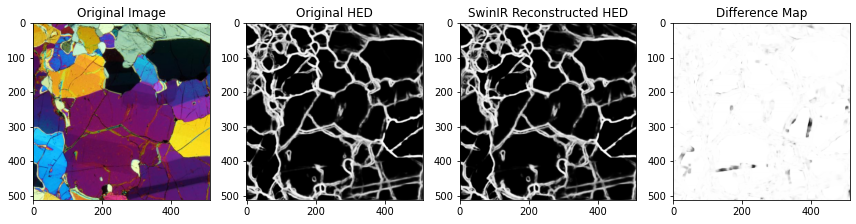

In [64]:
from skimage.metrics import structural_similarity
import cv2
import numpy as np

# Load images
before = hed_original.copy()
after = hed_swinir.copy()

# Convert images to grayscale
before_gray = cv2.cvtColor(before, cv2.COLOR_BGR2GRAY)
after_gray = cv2.cvtColor(after, cv2.COLOR_BGR2GRAY)

# Compute SSIM between the two images
(score, diff) = structural_similarity(before_gray, after_gray, full=True)
print("Image Similarity: {:.4f}%".format(score * 100))
ssim_swinir_hed = round(score * 100, 2)

# The diff image contains the actual image differences between the two images
# and is represented as a floating point data type in the range [0,1] 
# so we must convert the array to 8-bit unsigned integers in the range
# [0,255] before we can use it with OpenCV
diff = (diff * 255).astype("uint8")
diff_box = cv2.merge([diff, diff, diff])

# Threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]

mask = np.zeros(before.shape, dtype='uint8')
filled_after = after.copy()

for c in contours:
    area = cv2.contourArea(c)
    if area > 40:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(before, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.rectangle(after, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.rectangle(diff_box, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.drawContours(mask, [c], 0, (255,255,255), -1)
        cv2.drawContours(filled_after, [c], 0, (0,255,0), -1)

graphImgs([image_original,hed_original, hed_swinir, diff],["Original Image", "Original HED", "SwinIR Reconstructed HED", "Difference Map"])

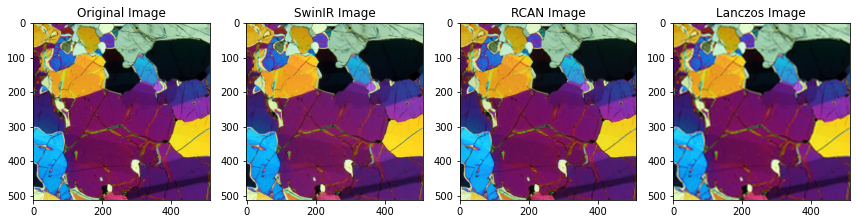

In [76]:
graphImgs([image_original, image_swinir, image_rcan, image_lanczos], ["Original Image", "SwinIR Image", "RCAN Image", "Lanczos Image"])

Image Similarity: 95.3144%


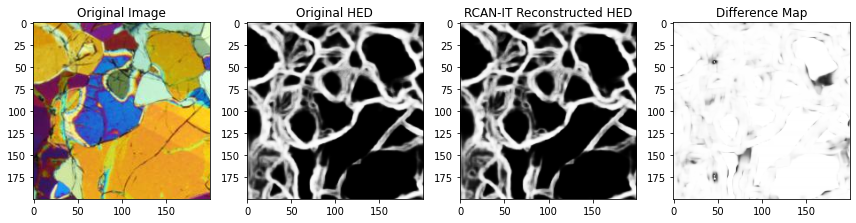

In [65]:
from skimage.metrics import structural_similarity
import cv2
import numpy as np

# Load images
before = hed_original.copy()
after = hed_rcan.copy()

# Convert images to grayscale
before_gray = cv2.cvtColor(before, cv2.COLOR_BGR2GRAY)
after_gray = cv2.cvtColor(after, cv2.COLOR_BGR2GRAY)

# Compute SSIM between the two images
(score, diff) = structural_similarity(before_gray, after_gray, full=True)
print("Image Similarity: {:.4f}%".format(score * 100))
ssim_rcan_hed = round(score * 100, 2)
# The diff image contains the actual image differences between the two images
# and is represented as a floating point data type in the range [0,1] 
# so we must convert the array to 8-bit unsigned integers in the range
# [0,255] before we can use it with OpenCV
diff = (diff * 255).astype("uint8")
diff_box = cv2.merge([diff, diff, diff])

# Threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]

mask = np.zeros(before.shape, dtype='uint8')
filled_after = after.copy()

for c in contours:
    area = cv2.contourArea(c)
    if area > 40:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(before, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.rectangle(after, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.rectangle(diff_box, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.drawContours(mask, [c], 0, (255,255,255), -1)
        cv2.drawContours(filled_after, [c], 0, (0,255,0), -1)

graphImgs([image_original[:200,:200,:],hed_original[:200,:200,:], hed_rcan[:200,:200,:], diff[:200,:200]],["Original Image", "Original HED", "RCAN-IT Reconstructed HED", "Difference Map"])

In [1]:
graphImgs([image_original, hed_original, hed_swinir, hed_rcan], ["Original Image", "Original HED", f"SwinIR  HED (SSIM:{round(ssim_swinir_hed/100,2)})", f"RCAN-IT HED (SSIM:{round(ssim_rcan_hed/100,2)})"])

NameError: name 'graphImgs' is not defined

Image Similarity: 93.9127%


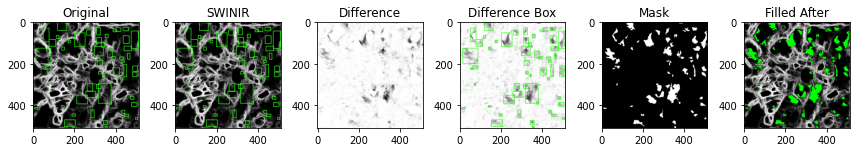

In [41]:
from skimage.metrics import structural_similarity
import cv2
import numpy as np

# Load images
before = hed_original.copy()
after = hed_swinir.copy()

# Convert images to grayscale
before_gray = cv2.cvtColor(before, cv2.COLOR_BGR2GRAY)
after_gray = cv2.cvtColor(after, cv2.COLOR_BGR2GRAY)

# Compute SSIM between the two images
(score, diff) = structural_similarity(before_gray, after_gray, full=True)
print("Image Similarity: {:.4f}%".format(score * 100))

# The diff image contains the actual image differences between the two images
# and is represented as a floating point data type in the range [0,1] 
# so we must convert the array to 8-bit unsigned integers in the range
# [0,255] before we can use it with OpenCV
diff = (diff * 255).astype("uint8")
diff_box = cv2.merge([diff, diff, diff])

# Threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]

mask = np.zeros(before.shape, dtype='uint8')
filled_after = after.copy()

for c in contours:
    area = cv2.contourArea(c)
    if area > 40:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(before, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.rectangle(after, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.rectangle(diff_box, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.drawContours(mask, [c], 0, (255,255,255), -1)
        cv2.drawContours(filled_after, [c], 0, (0,255,0), -1)

# cv2.imshow('before', before)
# cv2.imshow('after', after)
# cv2.imshow('diff', diff)
# cv2.imshow('diff_box', diff_box)
# cv2.imshow('mask', mask)
# cv2.imshow('filled after', filled_after)
cv2.waitKey()

graphImgs([before, after, diff, diff_box, mask, filled_after],["Original", "SWINIR", "Difference", "Difference Box","Mask", "Filled After"])

In [ ]:
graphImgs([before, after, diff, diff_box, mask, filled_after],["Original", "SWINIR", "Difference", "Difference Box","Mask", "Filled After"])

In [118]:
image_names = []
scores_rcan = []
scores_swinir = []
scores_bicubic = []
scores_lanczos = []

for image in os.listdir("../original/"):

    image_original = Image.open(folder_original + image)
    image_lanczos = Image.open(folder_lanczos + image)
    image_bicubic = Image.open(folder_bicubic + image)
    image_swinir = Image.open(folder_swinir + image)
    image_rcan = Image.open(folder_rcan + image)

    image_original = np.array(image_original)
    image_lanczos = np.array(image_lanczos)
    image_bicubic = np.array(image_bicubic)
    image_swinir = np.array(image_swinir)   
    image_rcan = np.array(image_rcan)
    
    hed_original = hed_filter(image_original)
    hed_lanczos = hed_filter(image_lanczos)
    hed_bicubic = hed_filter(image_bicubic)
    hed_swinir = hed_filter(image_swinir)
    hed_rcan = hed_filter(image_rcan)

    # Convert images to grayscale
    hed_original_gray = cv2.cvtColor(hed_original, cv2.COLOR_BGR2GRAY)
    hed_lanczos_gray = cv2.cvtColor(hed_lanczos, cv2.COLOR_BGR2GRAY)
    hed_bicubic_gray = cv2.cvtColor(hed_bicubic, cv2.COLOR_BGR2GRAY)
    hed_swinir_gray = cv2.cvtColor(hed_swinir, cv2.COLOR_BGR2GRAY)
    hed_rcan_gray = cv2.cvtColor(hed_rcan, cv2.COLOR_BGR2GRAY)


    # Compute SSIM between the two images
    (score_lanczos, diff) = structural_similarity(hed_original_gray, hed_lanczos_gray, full=True)
    (score_bicubic, diff) = structural_similarity(hed_original_gray, hed_bicubic_gray, full=True)
    (score_swinir, diff) = structural_similarity(hed_original_gray, hed_swinir_gray, full=True)
    (score_rcan, diff) = structural_similarity(hed_original_gray, hed_rcan_gray, full=True)

    #print("Image Similarity: {:.4f}%".format(score * 100))
    image_names.append(image)
    scores_rcan.append(score_rcan)
    scores_swinir.append(score_swinir)
    scores_bicubic.append(score_bicubic)
    scores_lanczos.append(score_lanczos)
    

In [124]:
# combine scores list into a dataframe

dct = {'Image':image_names,'SwinIR (2021)':scores_swinir, 'RCAN-IT (2022)':scores_rcan, 'Lanczos':scores_lanczos, 'Bicubic':scores_bicubic }
df = pd.DataFrame(dct)
df.to_csv('scores_ssim_hed.csv', index=False)



In [125]:
df

Image  SwinIR (2021)  RCAN-IT (2022)   Lanczos   Bicubic
0   2100.png       0.967324        0.943087  0.918195  0.909977
1   2101.png       0.894756        0.845672  0.824195  0.815872
2   2102.png       0.951981        0.928750  0.894962  0.892034
3   2103.png       0.925855        0.834032  0.824349  0.784192
4   2104.png       0.943457        0.931091  0.907574  0.902873
5   2105.png       0.871686        0.821087  0.808307  0.773626
6   2106.png       0.957006        0.926113  0.911093  0.897058
7   2107.png       0.977501        0.961749  0.944671  0.943655
8   2108.png       0.945921        0.918652  0.896242  0.899234
9   2109.png       0.892870        0.884604  0.858184  0.863818
10  2110.png       0.918675        0.833087  0.895230  0.889172
11  2111.png       0.939341        0.923539  0.899593  0.895898
12  2112.png       0.936009        0.877543  0.865583  0.844911
13  2113.png       0.925267        0.895182  0.878432  0.876602
14  2114.png       0.928952        0.897330  0.789995  0.803450
15  2115.png       0.963246        0.940123  0.918210  0.901012
16  2116.png       0.929204        0.876543  0.711122  0.732575
17  2117.png       0.928503        0.903637  0.807778  0.851641
18  2118.png       0.924192        0.885179  0.838522  0.845532
19  2119.png       0.850055        0.801180  0.813535  0.820020
20  2120.png       0.939127        0.883174  0.829926  0.815829
21  2121.png       0.970397        0.945836  0.940154  0.926101
22  2122.png       0.891273        0.766120  0.667616  0.722561
23  2123.png       0.910690        0.814715  0.751763  0.791617
24  2124.png       0.914602        0.854997  0.888573  0.882973
25  2125.png       0.934683        0.907290  0.858754  0.847027
26  2126.png       0.947263        0.892049  0.951652  0.948940
27  2127.png       0.930468        0.856373  0.875831  0.881182
28  2128.png       0.979241        0.953144  0.952351  0.948346
29  2129.png       0.993922        0.986194  0.989083  0.986392
30  2130.png       0.754220        0.655356  0.731528  0.775723
31  2131.png       0.770887        0.692944  0.675168  0.720164
32  2132.png       0.885197        0.903110  0.783939  0.788676
33  2133.png       0.910166        0.920152  0.814769  0.827278
34  2134.png       0.875187        0.871861  0.562484  0.596111
35  2135.png       0.969248        0.941999  0.925350  0.903591
36  2136.png       0.882619        0.842634  0.487348  0.504854
37  2137.png       0.963004        0.933976  0.916184  0.913687
38  2138.png       0.963985        0.935188  0.898561  0.878707
39  2139.png       0.979914        0.950853  0.963156  0.955545
40  2140.png       0.976065        0.946994  0.933588  0.937065
41  2141.png       0.862014        0.764071  0.765325  0.724325
42  2142.png       0.906916        0.868669  0.901214  0.906309
43  2143.png       0.891496        0.845237  0.717713  0.712554
44  2144.png       0.944463        0.901991  0.859991  0.861324
45  2145.png       0.951497        0.906752  0.880087  0.875255
46  2146.png       0.843404        0.824700  0.540235  0.490394
47  2147.png       0.959322        0.925113  0.920428  0.917542
48  2148.png       0.914009        0.884466  0.826701  0.845771
49  2149.png       0.985562        0.971700  0.968798  0.965880
50  2150.png       0.950075        0.911067  0.904146  0.890743

In [29]:
# plot df using violin and plotly
import plotly.express as px

try:
    import pandas as pd
    df = pd.read_csv('scores_ssim_hed.csv')
    df = df.drop(['Unnamed: 0'], axis=1)
except:
    pass
df_plot = df.drop(columns=["Image"])
fig = px.box(df_plot, points="all")
# add text that shows mean value in each box plot
for i in range(len(df_plot.columns)):
    fig.add_annotation(
        x=i,
        y=df_plot[df_plot.columns[i]].mean(),
        text="- mean = "+str(round(df_plot[df_plot.columns[i]].mean(), 2))+ " -",
        showarrow=False,
        xref="x",
        yref="y",
        font=dict(
            size=8,
            color="#000000"
        )
        #,
        # align="center",
        # bordercolor="#c7c7c7",
        # borderwidth=2,
        # borderpad=4,
        # bgcolor="#ffffff"
    )
# name x axis Method and y axis SSIM
fig.update_layout(
    xaxis_title="Method",    
    yaxis_title="SSIM",
    title="SSIM Comparison of Methods for HED Filter Image Restitution",
    title_x=0.5,
    font=dict(
        size=10,
        color="#000000"
    ))   

# write y-axis title horizontally
fig.update_yaxes(title_text="SSIM", title_standoff=0, tickangle=0)


# put gridlines on the plot
#fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='Gray')


 



fig.show()
fig.write_image("plot_ssim.svg")


In [144]:
!pip install -U kaleido

In [148]:
# print python version
import sys
print(sys.version)

3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]


In [9]:
from sewar.full_ref import mse, rmse, psnr, uqi, ssim, ergas, scc, rase, sam, msssim, vifp

In [10]:
upscaled_swinir = np.array(Image.open("../swinir_2x/2100.png"))
upscaled_rcan = np.array(Image.open("../rcanit_2x/2100.png"))
upscaled_lanczos = np.array(Image.open("../lanczos_2x/2100.png"))
upscaled_bicubic = np.array(Image.open("../bicubic_2x/2100.png"))

original = np.array(Image.open("../original/2100.png"))

    
print("MSE: ", round(mse(upscaled_bicubic,original), 4))
print("RMSE: ", round(rmse(upscaled_bicubic, original), 4))
print("PSNR: ", round(psnr(upscaled_bicubic, original), 4))
print("SSIM: ", round(ssim(upscaled_bicubic, original)[0], 4))
print("UQI: ", round(uqi(upscaled_bicubic, original), 4))
print("MSSSIM: ", msssim(upscaled_bicubic, original))
print("ERGAS: ", ergas(upscaled_bicubic, original))
print("SCC: ", scc(upscaled_bicubic, original))
print("RASE: ", rase(upscaled_bicubic, original))
print("SAM: ", sam(upscaled_bicubic, original))
print("VIF: ", vifp(upscaled_bicubic, original))


MSE:  45.8745
RMSE:  6.7731
PSNR:  31.5151
SSIM:  0.9134
UQI:  0.9935
MSSSIM:  (0.968656843156766+0j)
ERGAS:  2449.6611720129017
SCC:  0.574534187001252
RASE:  347.8756304051508
SAM:  0.048009468112646586
VIF:  0.523490983567938


In [11]:
print("MSE: ", round(mse(upscaled_swinir,original), 4))
print("RMSE: ", round(rmse(upscaled_swinir, original), 4))
print("PSNR: ", round(psnr(upscaled_swinir, original), 4))
print("SSIM: ", round(ssim(upscaled_swinir, original)[0], 4))
print("UQI: ", round(uqi(upscaled_swinir, original), 4))
print("MSSSIM: ", msssim(upscaled_swinir, original))
print("ERGAS: ", ergas(upscaled_swinir, original))
print("SCC: ", scc(upscaled_swinir, original))
print("RASE: ", rase(upscaled_swinir, original))
print("SAM: ", sam(upscaled_swinir, original))
print("VIF: ", vifp(upscaled_swinir, original))

MSE:  24.9325
RMSE:  4.9932
PSNR:  34.1631
SSIM:  0.9446
UQI:  0.9948
MSSSIM:  (0.9885792462556782+0j)
ERGAS:  1974.2693319026569
SCC:  0.6134331965880153
RASE:  281.8389759261073
SAM:  0.0353475004217659
VIF:  0.6070227260342813


In [12]:
print("MSE: ", round(mse(upscaled_lanczos,original), 4))
print("RMSE: ", round(rmse(upscaled_lanczos, original), 4))
print("PSNR: ", round(psnr(upscaled_lanczos, original), 4))
print("SSIM: ", round(ssim(upscaled_lanczos, original)[0], 4))
print("UQI: ", round(uqi(upscaled_lanczos, original), 4))
print("MSSSIM: ", msssim(upscaled_lanczos, original))
print("ERGAS: ", ergas(upscaled_lanczos, original))
print("SCC: ", scc(upscaled_lanczos, original))
print("RASE: ", rase(upscaled_lanczos, original))
print("SAM: ", sam(upscaled_lanczos, original))
print("VIF: ", vifp(upscaled_lanczos, original))

MSE:  46.7714
RMSE:  6.839
PSNR:  31.431
SSIM:  0.9119
UQI:  0.9932
MSSSIM:  (0.9679502341176629+0j)
ERGAS:  2514.5542292888235
SCC:  0.5556063251849245
RASE:  356.93289591031044
SAM:  0.04849219687943876
VIF:  0.5066183288056528


In [219]:
print("MSE: ", round(mse(upscaled_rcan,original), 4))
print("RMSE: ", round(rmse(upscaled_rcan, original), 4))
print("PSNR: ", round(psnr(upscaled_rcan, original), 4))
print("SSIM: ", round(ssim(upscaled_rcan, original)[0], 4))
print("UQI: ", round(uqi(upscaled_rcan, original), 4))
print("MSSSIM: ", msssim(upscaled_rcan, original))
print("ERGAS: ", ergas(upscaled_rcan, original))
print("SCC: ", scc(upscaled_rcan, original))
print("RASE: ", rase(upscaled_rcan, original))
print("SAM: ", sam(upscaled_rcan, original))
print("VIF: ", vifp(upscaled_rcan, original))

MSE:  36.9517
RMSE:  6.0788
PSNR:  32.4545
SSIM:  0.9225
UQI:  0.9927
MSSSIM:  (0.9720950061594882+0j)
ERGAS:  2404.718983612555
SCC:  0.6083229267699551
RASE:  341.09458715961574
SAM:  0.043092082193958346
VIF:  0.5502030342851991


In [215]:
print("MSE: ", round(mse(upscaled_swinir,original), 4))
print("RMSE: ", round(rmse(upscaled_swinir, original), 4))
print("PSNR: ", round(psnr(upscaled_swinir, original), 4))
print("SSIM: ", round(ssim(upscaled_swinir, original)[0], 4))
print("UQI: ", round(uqi(upscaled_swinir, original), 4))

MSE:  24.9325
RMSE:  4.9932
PSNR:  34.1631
SSIM:  0.9446
UQI:  0.9948


In [ ]:
print("MSE: ", round(mse(upscaled_swinir,original), 4))
print("RMSE: ", round(rmse(upscaled_swinir, original), 4))
print("PSNR: ", round(psnr(upscaled_swinir, original), 4))
print("SSIM: ", round(ssim(upscaled_swinir, original)[0], 4))
print("UQI: ", round(uqi(upscaled_swinir, original), 4))

In [13]:
 type(msssim(upscaled_swinir, original))

numpy.complex128

In [14]:
upscaled_swinir = np.array(Image.open("../swinir_2x/2100.png"))
upscaled_rcan = np.array(Image.open("../rcanit_2x/2100.png"))
upscaled_lanczos = np.array(Image.open("../lanczos_2x/2100.png"))
upscaled_bicubic = np.array(Image.open("../bicubic_2x/2100.png"))

original = np.array(Image.open("../original/2100.png"))

    
# print("MSE: ", mse(upscaled,original))
# print("RMSE: ", rmse(upscaled, original))
# print("PSNR: ", psnr(upscaled, original))
# print("SSIM: ", ssim(upscaled, original))
# print("UQI: ", uqi(upscaled, original))
# print("MSSSIM: ", msssim(upscaled, original))
# print("ERGAS: ", ergas(upscaled, original))
# print("SCC: ", scc(upscaled, original))
# print("RASE: ", rase(upscaled, original))
# print("SAM: ", sam(upscaled, original))
# print("VIF: ", vifp(upscaled, original))
# scale="2x"
# method="swinir"
from tqdm import tqdm
def get_metrics(method="swinir", scale="2x"):

    mse_scores = []
    rmse_scores = []
    psnr_scores = []
    ssim_scores = []
    uqi_scores = []
    msssim_scores = []
    ergas_scores = []
    scc_scores = []
    #rase_scores = []
    sam_scores = []
    vifp_scores = []
    image_names = []

    for i in tqdm(os.listdir("../original/")):

        original = np.array(Image.open("../original/"+i))
        swinir = np.array(Image.open(f"../{method}_{scale}/"+i))
        # rcan = np.array(Image.open(f"../rcanit_{scale}/"+i))
        # lanczos = np.array(Image.open(f"../lanczos_{scale}/"+i))
        # bicubic = np.array(Image.open(f"../bicubic_{scale}/"+i))

        image_names.append(i)
        
        mse_scores.append(mse(original, swinir))
        rmse_scores.append(rmse(original, swinir))
        psnr_scores.append(psnr(original, swinir))
        ssim_scores.append(ssim(original, swinir))
        uqi_scores.append(uqi(original, swinir))
        msssim_scores.append(msssim(original, swinir))
        ergas_scores.append(ergas(original, swinir))
        scc_scores.append(scc(original, swinir))
        #rase_scores.append(rase(original, swinir))
        sam_scores.append(sam(original, swinir))
        vifp_scores.append(vifp(original, swinir))

    return np.mean(mse_scores), np.mean(rmse_scores), np.mean(psnr_scores), np.mean(ssim_scores), np.mean(uqi_scores), np.mean(msssim_scores), np.mean(ergas_scores), np.mean(scc_scores), np.mean(sam_scores), np.mean(vifp_scores)


In [15]:
mse_avg_swinir, rmse_avg_swinir, psnr_avg_swinir, ssim_avg_swinir, uqi_avg_swinir, msssim_avg_swinir, ergas_avg_swinir, scc_avg_swinir, sam_avg_swinir, vifp_avg_swinir = get_metrics(method="swinir", scale="2x")
mse_avg_rcan, rmse_avg_rcan, psnr_avg_rcan, ssim_avg_rcan, uqi_avg_rcan, msssim_avg_rcan, ergas_avg_rcan, scc_avg_rcan, sam_avg_rcan, vifp_avg_rcan = get_metrics(method="rcanit", scale="2x")
mse_avg_lanczos, rmse_avg_lanczos, psnr_avg_lanczos, ssim_avg_lanczos, uqi_avg_lanczos, msssim_avg_lanczos, ergas_avg_lanczos, scc_avg_lanczos, sam_avg_lanczos, vifp_avg_lanczos = get_metrics(method="lanczos", scale="2x")
mse_avg_bicubic, rmse_avg_bicubic, psnr_avg_bicubic, ssim_avg_bicubic, uqi_avg_bicubic, msssim_avg_bicubic, ergas_avg_bicubic, scc_avg_bicubic, sam_avg_bicubic, vifp_avg_bicubic = get_metrics(method="bicubic", scale="2x")
mse_avg_bilinear, rmse_avg_bilinear, psnr_avg_bilinear, ssim_avg_bilinear, uqi_avg_bilinear, msssim_avg_bilinear, ergas_avg_bilinear, scc_avg_bilinear, sam_avg_bilinear, vifp_avg_bilinear = get_metrics(method="bilinear", scale="2x")
mse_avg_nearest, rmse_avg_nearest, psnr_avg_nearest, ssim_avg_nearest, uqi_avg_nearest, msssim_avg_nearest, ergas_avg_nearest, scc_avg_nearest, sam_avg_nearest, vifp_avg_nearest = get_metrics(method="nearest", scale="2x")


100%|██████████| 51/51 [06:44<00:00,  7.93s/it]


In [17]:
# make a dataframe out of averages
df = pd.DataFrame()
columns = ["MSE", "RMSE", "PSNR", "SSIM", "UQI", "MS-SSIM", "ERGAS", "SCC", "SAM", "VIF"]
df["Method"] = ["SwinIR", "RCAN-IT", "Lanczos", "Bicubic", "Bilinear", "Nearest"]
# df["Scale"] = ["2x"]
df["MSE"] = [mse_avg_swinir, mse_avg_rcan, mse_avg_lanczos, mse_avg_bicubic, mse_avg_bilinear, mse_avg_nearest]
df["RMSE"] = [rmse_avg_swinir, rmse_avg_rcan, rmse_avg_lanczos, rmse_avg_bicubic, rmse_avg_bilinear, rmse_avg_nearest]
df["PSNR"] = [psnr_avg_swinir, psnr_avg_rcan, psnr_avg_lanczos, psnr_avg_bicubic, psnr_avg_bilinear, psnr_avg_nearest]
df["SSIM"] = [ssim_avg_swinir, ssim_avg_rcan, ssim_avg_lanczos, ssim_avg_bicubic, ssim_avg_bilinear, ssim_avg_nearest]
df["UQI"] = [uqi_avg_swinir, uqi_avg_rcan, uqi_avg_lanczos, uqi_avg_bicubic, uqi_avg_bilinear, uqi_avg_nearest]
df["MS-SSIM"] = [float(msssim_avg_swinir), float(msssim_avg_rcan), float(msssim_avg_lanczos), float(msssim_avg_bicubic), float(msssim_avg_bilinear), float(msssim_avg_nearest)]
df["ERGAS"] = [ergas_avg_swinir, ergas_avg_rcan, ergas_avg_lanczos, ergas_avg_bicubic, ergas_avg_bilinear, ergas_avg_nearest]
df["SCC"] = [scc_avg_swinir, scc_avg_rcan, scc_avg_lanczos, scc_avg_bicubic, scc_avg_bilinear, scc_avg_nearest]
df["SAM"] = [sam_avg_swinir, sam_avg_rcan, sam_avg_lanczos, sam_avg_bicubic, sam_avg_bilinear, sam_avg_nearest]
df["VIF"] = [vifp_avg_swinir, vifp_avg_rcan, vifp_avg_lanczos, vifp_avg_bicubic, vifp_avg_bilinear, vifp_avg_nearest]

# save dataframe
df.to_csv("full_metrics_2x.csv", index=False)
df.to_excel("full_metrics_2x.xlsx", index=False)


df

<ipython-input-17-5bc1adf38fd2>:11: ComplexWarning: Casting complex values to real discards the imaginary part
  df["MS-SSIM"] = [float(msssim_avg_swinir), float(msssim_avg_rcan), float(msssim_avg_lanczos), float(msssim_avg_bicubic), float(msssim_avg_bilinear), float(msssim_avg_nearest)]


Method         MSE       RMSE       PSNR      SSIM       UQI   MS-SSIM  \
0    SwinIR   50.707953   6.651601  32.304884  0.965211  0.994619  0.992214   
1   RCAN-IT   85.396838   8.643202  30.006805  0.943947  0.990801  0.979589   
2   Lanczos   88.029021   8.741465  29.979701  0.943473  0.992758  0.979719   
3   Bicubic   88.718806   8.790837  29.914170  0.942284  0.992854  0.979061   
4  Bilinear  115.470850  10.073925  28.685565  0.921540  0.990763  0.971945   
5   Nearest  181.347704  12.735429  26.558204  0.905461  0.986962  0.971027   

         ERGAS       SCC       SAM       VIF  
0  3405.374103  0.669741  0.051844  0.615821  
1  4346.090713  0.627551  0.067762  0.545025  
2  4233.664776  0.622109  0.067872  0.543662  
3  4211.123318  0.627486  0.068282  0.539968  
4  4823.647457  0.613171  0.078253  0.500175  
5  6080.317916  0.448895  0.099670  0.444662

In [18]:
mse_avg_swinir, rmse_avg_swinir, psnr_avg_swinir, ssim_avg_swinir, uqi_avg_swinir, msssim_avg_swinir, ergas_avg_swinir, scc_avg_swinir, sam_avg_swinir, vifp_avg_swinir = get_metrics(method="swinir", scale="4x")
mse_avg_rcan, rmse_avg_rcan, psnr_avg_rcan, ssim_avg_rcan, uqi_avg_rcan, msssim_avg_rcan, ergas_avg_rcan, scc_avg_rcan, sam_avg_rcan, vifp_avg_rcan = get_metrics(method="rcanit", scale="4x")
mse_avg_lanczos, rmse_avg_lanczos, psnr_avg_lanczos, ssim_avg_lanczos, uqi_avg_lanczos, msssim_avg_lanczos, ergas_avg_lanczos, scc_avg_lanczos, sam_avg_lanczos, vifp_avg_lanczos = get_metrics(method="lanczos", scale="4x")
mse_avg_bicubic, rmse_avg_bicubic, psnr_avg_bicubic, ssim_avg_bicubic, uqi_avg_bicubic, msssim_avg_bicubic, ergas_avg_bicubic, scc_avg_bicubic, sam_avg_bicubic, vifp_avg_bicubic = get_metrics(method="bicubic", scale="4x")
mse_avg_bilinear, rmse_avg_bilinear, psnr_avg_bilinear, ssim_avg_bilinear, uqi_avg_bilinear, msssim_avg_bilinear, ergas_avg_bilinear, scc_avg_bilinear, sam_avg_bilinear, vifp_avg_bilinear = get_metrics(method="bilinear", scale="4x")
mse_avg_nearest, rmse_avg_nearest, psnr_avg_nearest, ssim_avg_nearest, uqi_avg_nearest, msssim_avg_nearest, ergas_avg_nearest, scc_avg_nearest, sam_avg_nearest, vifp_avg_nearest = get_metrics(method="nearest", scale="4x")

# make a dataframe out of averages
df = pd.DataFrame()
columns = ["MSE", "RMSE", "PSNR", "SSIM", "UQI", "MS-SSIM", "ERGAS", "SCC", "SAM", "VIF"]
df["Method"] = ["SwinIR", "RCAN-IT", "Lanczos", "Bicubic", "Bilinear", "Nearest"]
# df["Scale"] = ["2x"]
df["MSE"] = [mse_avg_swinir, mse_avg_rcan, mse_avg_lanczos, mse_avg_bicubic, mse_avg_bilinear, mse_avg_nearest]
df["RMSE"] = [rmse_avg_swinir, rmse_avg_rcan, rmse_avg_lanczos, rmse_avg_bicubic, rmse_avg_bilinear, rmse_avg_nearest]
df["PSNR"] = [psnr_avg_swinir, psnr_avg_rcan, psnr_avg_lanczos, psnr_avg_bicubic, psnr_avg_bilinear, psnr_avg_nearest]
df["SSIM"] = [ssim_avg_swinir, ssim_avg_rcan, ssim_avg_lanczos, ssim_avg_bicubic, ssim_avg_bilinear, ssim_avg_nearest]
df["UQI"] = [uqi_avg_swinir, uqi_avg_rcan, uqi_avg_lanczos, uqi_avg_bicubic, uqi_avg_bilinear, uqi_avg_nearest]
df["MS-SSIM"] = [float(msssim_avg_swinir), float(msssim_avg_rcan), float(msssim_avg_lanczos), float(msssim_avg_bicubic), float(msssim_avg_bilinear), float(msssim_avg_nearest)]
df["ERGAS"] = [ergas_avg_swinir, ergas_avg_rcan, ergas_avg_lanczos, ergas_avg_bicubic, ergas_avg_bilinear, ergas_avg_nearest]
df["SCC"] = [scc_avg_swinir, scc_avg_rcan, scc_avg_lanczos, scc_avg_bicubic, scc_avg_bilinear, scc_avg_nearest]
df["SAM"] = [sam_avg_swinir, sam_avg_rcan, sam_avg_lanczos, sam_avg_bicubic, sam_avg_bilinear, sam_avg_nearest]
df["VIF"] = [vifp_avg_swinir, vifp_avg_rcan, vifp_avg_lanczos, vifp_avg_bicubic, vifp_avg_bilinear, vifp_avg_nearest]

# save dataframe
df.to_csv("full_metrics_4x.csv", index=False)
df.to_excel("full_metrics_4x.xlsx", index=False)

100%|██████████| 51/51 [05:39<00:00,  6.65s/it]
<ipython-input-18-7b76ef8a9e74>:18: ComplexWarning: Casting complex values to real discards the imaginary part
  df["MS-SSIM"] = [float(msssim_avg_swinir), float(msssim_avg_rcan), float(msssim_avg_lanczos), float(msssim_avg_bicubic), float(msssim_avg_bilinear), float(msssim_avg_nearest)]


In [227]:
mse_avg_rcan, rmse_avg_rcan, psnr_avg_rcan, ssim_avg_rcan, uqi_avg_rcan, msssim_avg_rcan, ergas_avg_rcan, scc_avg_rcan, sam_avg_rcan, vifp_avg_rcan = get_metrics(method="rcanit", scale="4x")
# make a dataframe out of averages
df = pd.DataFrame()
columns = ["MSE", "RMSE", "PSNR", "SSIM", "UQI", "MS-SSIM", "ERGAS", "SCC", "SAM", "VIF"]
df["Method"] = ["SwinIR", "RCAN-IT", "Lanczos", "Bicubic"]
# df["Scale"] = ["2x"]
df["MSE"] = [mse_avg_swinir, mse_avg_rcan, mse_avg_lanczos, mse_avg_bicubic]
df["RMSE"] = [rmse_avg_swinir, rmse_avg_rcan, rmse_avg_lanczos, rmse_avg_bicubic]
df["PSNR"] = [psnr_avg_swinir, psnr_avg_rcan, psnr_avg_lanczos, psnr_avg_bicubic]
df["SSIM"] = [ssim_avg_swinir, ssim_avg_rcan, ssim_avg_lanczos, ssim_avg_bicubic]
df["UQI"] = [uqi_avg_swinir, uqi_avg_rcan, uqi_avg_lanczos, uqi_avg_bicubic]
df["MS-SSIM"] = [float(msssim_avg_swinir), float(msssim_avg_rcan), float(msssim_avg_lanczos), float(msssim_avg_bicubic)]
df["ERGAS"] = [ergas_avg_swinir, ergas_avg_rcan, ergas_avg_lanczos, ergas_avg_bicubic]
df["SCC"] = [scc_avg_swinir, scc_avg_rcan, scc_avg_lanczos, scc_avg_bicubic]
df["SAM"] = [sam_avg_swinir, sam_avg_rcan, sam_avg_lanczos, sam_avg_bicubic]
df["VIF"] = [vifp_avg_swinir, vifp_avg_rcan, vifp_avg_lanczos, vifp_avg_bicubic]

# save dataframe
df.to_csv("full_metrics_4x.csv", index=False)
df.to_excel("full_metrics_4x.xlsx", index=False)

100%|██████████| 51/51 [06:24<00:00,  7.55s/it]
<ipython-input-227-8e3cbd9c5062>:12: ComplexWarning:

Casting complex values to real discards the imaginary part



In [205]:
print(np.mean(mse_scores))
print(np.mean(rmse_scores))
print(np.mean(psnr_scores))
print(np.mean(ssim_scores))
print(np.mean(uqi_scores))
print(np.mean(msssim_scores))
print(np.mean(ergas_scores))
print(np.mean(scc_scores))
print(np.mean(rase_scores))
print(np.mean(sam_scores))
print(np.mean(vifp_scores))


50.70795330970116
6.651600855662337
32.30488447022266
0.9652113086741156
0.9946192067668799
(0.9922138249397158+0j)
3405.3741027612296
0.6697409441871416
inf
0.051843578625099244
0.6158208010126905


In [ ]:
dct = {"Image":